# How much of Canada’s population can be fed on food grown nationally? Which countries should we work with to fill gaps in the food supply?​

In [11]:
import base64
import pandas as pd
def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

onedrive_link = "https://1drv.ms/x/s!AvCFI7fzKgPmhPgdBfd8_ELP60kp9Q?e=qUIPTG"
onedrive_direct_link = create_onedrive_directdownload(onedrive_link)
df = pd.read_excel(onedrive_direct_link)
df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, with shell",2015,2015,ha,14676.0,NaN,Official data
1,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, with shell",2016,2016,ha,19481.0,NaN,Official data
2,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, with shell",2017,2017,ha,19793.0,NaN,Official data
3,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, with shell",2018,2018,ha,20053.0,NaN,Official data
4,QCL,Crops and livestock products,2,Afghanistan,5312,Area harvested,221,"Almonds, with shell",2019,2019,ha,29203.0,NaN,Official data


In [12]:
dfCanada = df.loc[(df['Area'] == 'Canada')]

In [13]:
if not sum(dfCanada.isna().any()):
    print('No missing values in dataset')
else:
    print('Missing Data \n{}'.format(dfCanada.isna().any()))

Missing Data 
Domain Code         False
Domain              False
Area Code (FAO)     False
Area                False
Element Code        False
Element             False
Item Code (FAO)     False
Item                False
Year Code           False
Year                False
Unit                False
Value                True
Flag                 True
Flag Description    False
dtype: bool


In [14]:
dfCanada.head(10)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
32892,QCL,Crops and livestock products,33,Canada,5312,Area harvested,711,"Anise, badian, fennel, coriander",2015,2015,ha,14434.0,Im,FAO data based on imputation methodology
32893,QCL,Crops and livestock products,33,Canada,5312,Area harvested,711,"Anise, badian, fennel, coriander",2016,2016,ha,14568.0,Im,FAO data based on imputation methodology
32894,QCL,Crops and livestock products,33,Canada,5312,Area harvested,711,"Anise, badian, fennel, coriander",2017,2017,ha,14828.0,Im,FAO data based on imputation methodology
32895,QCL,Crops and livestock products,33,Canada,5312,Area harvested,711,"Anise, badian, fennel, coriander",2018,2018,ha,15082.0,Im,FAO data based on imputation methodology
32896,QCL,Crops and livestock products,33,Canada,5312,Area harvested,711,"Anise, badian, fennel, coriander",2019,2019,ha,15333.0,Im,FAO data based on imputation methodology
32897,QCL,Crops and livestock products,33,Canada,5419,Yield,711,"Anise, badian, fennel, coriander",2015,2015,hg/ha,8754.0,Fc,Calculated data
32898,QCL,Crops and livestock products,33,Canada,5419,Yield,711,"Anise, badian, fennel, coriander",2016,2016,hg/ha,8674.0,Fc,Calculated data
32899,QCL,Crops and livestock products,33,Canada,5419,Yield,711,"Anise, badian, fennel, coriander",2017,2017,hg/ha,8756.0,Fc,Calculated data
32900,QCL,Crops and livestock products,33,Canada,5419,Yield,711,"Anise, badian, fennel, coriander",2018,2018,hg/ha,8837.0,Fc,Calculated data
32901,QCL,Crops and livestock products,33,Canada,5419,Yield,711,"Anise, badian, fennel, coriander",2019,2019,hg/ha,8918.0,Fc,Calculated data


In [21]:
import hvplot.pandas
dfCanada.hvplot(x='Element', y='Value', kind='bar', groupby='Year')

:DynamicMap   [Year]
   :Bars   [Element]   (Value)

In [15]:
Production = dfCanada.loc[(dfCanada['Element'] == 'Production') | (dfCanada['Element'] == 'Producing Animals/Slaughtered')]
Production.drop(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code', 'Item Code (FAO)', 'Year Code', 'Flag', 'Flag Description'], axis=1, inplace=True)
Production.to_pickle("CanadaProduction.pkl")

C:\Users\proud\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
import pandas as pd
Production = pd.read_pickle("CanadaProduction.pkl")

In [70]:
Production.head(10)

,Element,Item,Year,Unit,Value
32902,Production,"Anise, badian, fennel, coriander",2015,tonnes,12635.0
32903,Production,"Anise, badian, fennel, coriander",2016,tonnes,12637.0
32904,Production,"Anise, badian, fennel, coriander",2017,tonnes,12983.0
32905,Production,"Anise, badian, fennel, coriander",2018,tonnes,13328.0
32906,Production,"Anise, badian, fennel, coriander",2019,tonnes,13674.0
32917,Production,Apples,2015,tonnes,348508.0
32918,Production,Apples,2016,tonnes,417989.0
32919,Production,Apples,2017,tonnes,402082.0
32920,Production,Apples,2018,tonnes,402978.0
32921,Production,Apples,2019,tonnes,377929.0


In [71]:
itemsProduced = Production.Item.unique()
prodItems= {"Fruits Group" : ['Apples', 'Apricots', 'Berries nes', 'Blueberries', 'Cherries',
    'Cherries, sour', 'Cranberries', 'Fruit, fresh nes', 'Grapes', 'Kiwi fruit', 
    'Melons, other (inc.cantaloupes)', 'Peaches and nectarines', 'Pears', 'Plums and sloes', 
    'Pumpkins, squash and gourds', 'Raspberries', 'Strawberries', 'Tomatoes', 'Watermelons' 'Leeks, other alliaceous vegetables'],
    'Vegetables Group' : ['Asparagus', 'Cabbages and other brassicas', 'Carrots and turnips', 'Cauliflowers and broccoli',
    'Chillies and peppers, green', 'Leeks, other alliaceous vegetables', 'Mushrooms and truffles', 'Onions, dry', 
    'Peas, green', 'Potatoes', 'Spinach', 'Vegetables, fresh nes'],
    "Beans, Eggs, Meats, and Nuts Group" : ['Beans, dry', 'Beans, green', 'Broad beans, horse beans, dry', 'Chick peas','Eggs, hen, in shell', 
    'Eggs, hen, in shell (number)', 'Lentils', 'Meat nes', 'Meat, cattle', 'Meat, chicken', 'Meat, duck', 
    'Meat, goose and guinea fowl', 'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey', 'Offals, edible, cattle', 
    'Offals, horses', 'Offals, pigs, edible', 'Offals, sheep,edible', 'Skins, sheep, fresh'],
    "Grains and Wheat Group" : ['Barley', 'Buckwheat', 'Canary seed', 'Fibre crops nes', 'Grain, mixed', 'Linseed', 'Maize', 'Maize, green',
    'Oats', 'Rapeseed', 'Rye', 'Safflower seed', 'Soybeans', 'Sunflower seed', 'Triticale', 'Wheat', 'Whey, dry'],
    "Cheese, Milk, and Yoghurt Group" : ['Butter, cow milk', 'Cheese, skimmed cow milk', 'Cheese, whole cow milk', 'Cream fresh', 
    'Milk, dry buttermilk', 'Milk, skimmed condensed', 'Milk, skimmed cow', 'Milk, skimmed dried', 'Milk, skimmed evaporated',
    'Milk, whole condensed', 'Milk, whole dried', 'Milk, whole evaporated', 'Milk, whole fresh cow'],
    "Fat, Oil, and Sugar Group" : ['Fat, cattle', 'Fat, cattle', 'Fat, pigs', 'Fat, sheep', 'Margarine, short', 'Oil, rapeseed', 'Oil, soybean', 
    'Oil, sunflower', 'Oilseeds nes', 'Sugar beet', 'Sugar Raw Centrifugal', 'Tallow']}
dfItems = pd.DataFrame.from_dict(prodItems, orient='index')
dfItems = dfItems.transpose()

In [72]:
prodItems = dfItems.to_dict(orient='records')
item = []
group = []
for x in prodItems:
    item += x.values()
    group += x.keys()
dfTemp = pd.DataFrame(list(zip(item, group)), columns=['Item', 'Group'])
Production = Production.merge(dfTemp, how='left', on='Item')

In [73]:
Production.head(10)

,Element,Item,Year,Unit,Value,Group
0,Production,"Anise, badian, fennel, coriander",2015,tonnes,12635.0,NaN
1,Production,"Anise, badian, fennel, coriander",2016,tonnes,12637.0,NaN
2,Production,"Anise, badian, fennel, coriander",2017,tonnes,12983.0,NaN
3,Production,"Anise, badian, fennel, coriander",2018,tonnes,13328.0,NaN
4,Production,"Anise, badian, fennel, coriander",2019,tonnes,13674.0,NaN
5,Production,Apples,2015,tonnes,348508.0,Fruits Group
6,Production,Apples,2016,tonnes,417989.0,Fruits Group
7,Production,Apples,2017,tonnes,402082.0,Fruits Group
8,Production,Apples,2018,tonnes,402978.0,Fruits Group
9,Production,Apples,2019,tonnes,377929.0,Fruits Group


In [110]:
Production.dropna(inplace=True)
Production.sort_values('Value', ascending=False)

,Element,Item,Year,Unit,Value,Group
606,Production,Wheat,2019,tonnes,32347900.0,Grains and Wheat Group
605,Production,Wheat,2018,tonnes,32201100.0,Grains and Wheat Group
603,Production,Wheat,2016,tonnes,32139900.0,Grains and Wheat Group
604,Production,Wheat,2017,tonnes,30377235.0,Grains and Wheat Group
277,Producing Animals/Slaughtered,"Meat, cattle",2019,Head,29085833.0,"Beans, Eggs, Meats, and Nuts Group"
...,...,...,...,...,...,...
180,Production,"Fruit, fresh nes",2015,tonnes,0.0,Fruits Group
54,Production,Buckwheat,2015,tonnes,0.0,Grains and Wheat Group
181,Production,"Fruit, fresh nes",2016,tonnes,0.0,Fruits Group
182,Production,"Fruit, fresh nes",2017,tonnes,0.0,Fruits Group


In [174]:
dfGroupProd = Production.groupby(['Year','Group','Item']).sum()
dfGroupProd.reset_index(drop=False, inplace=True)
dfGroupProd.sort_values('Value', ascending=False, inplace=True)
dfGroupProd.to_pickle('GroupProduction.pkl')
Production.to_pickle('CanadaProduction.pkl')

In [184]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import colorcet as cc

dfGroupProd = pd.read_pickle('GroupProduction.pkl')
Production = pd.read_pickle('CanadaProduction.pkl')

In [178]:
widgetGroupProduction = Production.hvplot.barh(x='Group', y='Value', groupby='Year', title='Amount Produced Per Food Group Every Year (2015 - 2019)', hover_cols='Item', responsive=True, min_height=300)
widgetGroupProduction

:DynamicMap   [Year]
   :Bars   [Group]   (Value,Item)

In [172]:
widgetValueCount = Production.hvplot.hist(y='Value', responsive=True, min_height=300, min_width=300)
widgetYearCount = Production.hvplot.hist(y='Year', responsive=True, min_height=300, min_width=300)

In [173]:
ls = hv.link_selections.instance()
linkYearValue = ls(widgetValueCount + widgetYearCount)
linkYearValue

:Layout
   .Histogram.I  :DynamicMap   []
      :Overlay
         .Histogram.I  :Histogram   [Value]   (Value_count)
         .NdOverlay.I  :NdOverlay   [Element]
            :VSpan   [x,y]
         .Histogram.II :Histogram   [Value]   (Value_count)
   .Histogram.II :DynamicMap   []
      :Overlay
         .Histogram.I  :Histogram   [Year]   (Year_count)
         .NdOverlay.I  :NdOverlay   [Element]
            :VSpan   [x,y]
         .Histogram.II :Histogram   [Year]   (Year_count)

<AxesSubplot:xlabel='Value', ylabel='Item'>

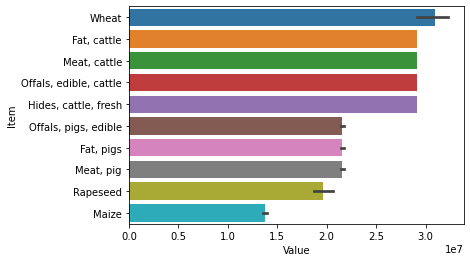

In [46]:
ProductionTop34 = Production.head(34)
sns.barplot(y="Item", x="Value", data=ProductionTop34)

In [54]:
vegProd = Production[Production['Item Code (FAO)'] == 463]

<AxesSubplot:xlabel='Year', ylabel='Value'>

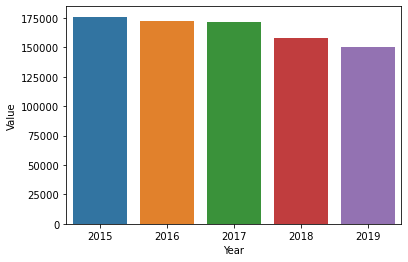

In [55]:
sns.barplot(x='Year', y='Value', data=vegProd)

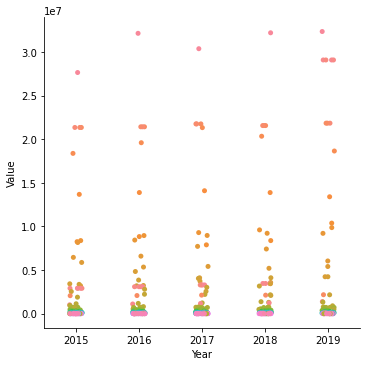

In [67]:
sns.catplot(x='Year', y='Value', hue='Item', data=Production, legend=False)

In [68]:
onedrive_link = "https://1drv.ms/x/s!AvCFI7fzKgPmhPdlvLYIyvWk4KFM7g?e=ppwWNX"
onedrive_direct_link = create_onedrive_directdownload(onedrive_link)
dfAvail = pd.read_excel(onedrive_direct_link)
dfAvail.head()

,REF_DATE,GEO,DGUID,Food categories,Commodity,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1960,Canada,2016A000011124,Food available,Wheat flour,"Kilograms per person, per year",194,units,0,v108209,1.1.1,59.19,NaN,NaN,NaN,2
1,1960,Canada,2016A000011124,Food available,Rye flour,"Kilograms per person, per year",194,units,0,v108220,1.1.2,0.46,NaN,NaN,NaN,2
2,1960,Canada,2016A000011124,Food available,Oatmeal and rolled oats,"Kilograms per person, per year",194,units,0,v108231,1.1.3,2.15,NaN,NaN,NaN,2
3,1960,Canada,2016A000011124,Food available,Pot and pearl barley,"Kilograms per person, per year",194,units,0,v108242,1.1.4,0.09,NaN,NaN,NaN,2
4,1960,Canada,2016A000011124,Food available,Corn flour and meal,"Kilograms per person, per year",194,units,0,v108253,1.1.5,0.75,NaN,NaN,NaN,2


In [82]:
dfAvail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32278 entries, 19160 to 32271
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   REF_DATE         32278 non-null  int64  
 1   GEO              32278 non-null  object 
 2   DGUID            32278 non-null  object 
 3   Food categories  32278 non-null  object 
 4   Commodity        32278 non-null  object 
 5   UOM              32278 non-null  object 
 6   UOM_ID           32278 non-null  int64  
 7   SCALAR_FACTOR    32278 non-null  object 
 8   SCALAR_ID        32278 non-null  int64  
 9   VECTOR           32278 non-null  object 
 10  COORDINATE       32278 non-null  object 
 11  VALUE            31538 non-null  float64
 12  STATUS           740 non-null    object 
 13  SYMBOL           0 non-null      float64
 14  TERMINATED       286 non-null    object 
 15  DECIMALS         32278 non-null  int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 5.4+

C:\Users\proud\AppData\Local\Temp/ipykernel_27864/4181844799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  availability.sort_values('VALUE', ascending=False, inplace=True)


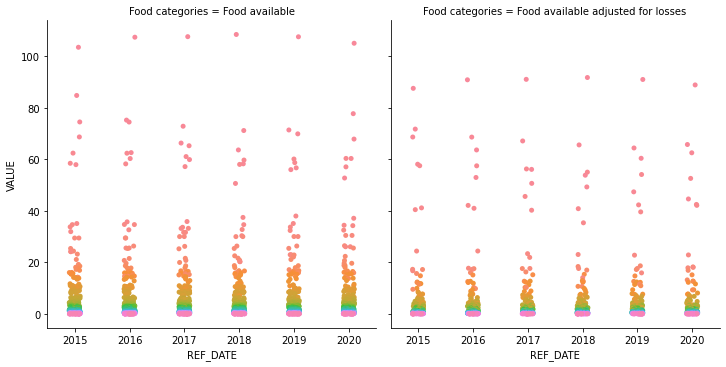

In [119]:
availability = dfAvail[dfAvail['REF_DATE'] >= 2015]
availability.sort_values('VALUE', ascending=False, inplace=True)
availabilityTop10 = availability.head(10)
sns.catplot(x="REF_DATE", y='VALUE', hue='Commodity', col='Food categories', legend=False, data=availability)

## Step 1. What does Canada produce locally?

In [183]:
(widgetGroupProduction+linkYearValue).cols(1)

:Layout
   .DynamicMap.I :DynamicMap   [Year]
      :Bars   [Group]   (Value,Item)
   .Histogram.I  :DynamicMap   []
      :Overlay
         .Histogram.I  :Histogram   [Value]   (Value_count)
         .NdOverlay.I  :NdOverlay   [Element]
            :VSpan   [x,y]
         .Histogram.II :Histogram   [Value]   (Value_count)
   .Histogram.II :DynamicMap   []
      :Overlay
         .Histogram.I  :Histogram   [Year]   (Year_count)
         .NdOverlay.I  :NdOverlay   [Element]
            :VSpan   [x,y]
         .Histogram.II :Histogram   [Year]   (Year_count)

## Step 2. What do we eat?

In [1]:
import onedrive
import pandas as pd

Fruits = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgX2ISEEtPDUQPQLQ?e=u1lxao", name="Fruits Group")
NSVeg = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgYVP0cqr769sZpIA?e=QHbYcr", name="Vegetables Group")
Potatoes = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgcumMfzxhQdwDcWA?e=CdkUNF", name="Vegetables Group")
StarchyVeg = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPge52OmuiBxOqwbTQ?e=7ONDlx", name="Vegetables Group")
BeanLegume = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgfWilAsD5HvgRopA?e=gQIPx4", name="Beans, Eggs, Meats, and Nuts Group")
NutsSeeds = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgglQeMRUDh_1uoXQ?e=jri8gM", name="Beans, Eggs, Meats, and Nuts Group")
RefinedGrains = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgjTm7G5rmhWnX0IQ?e=Yy6hqh", name="Grains and Wheat Group")
WholeGrains = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgkQZnWmkkI7cbbOw?e=ab2NF5", name="Grains and Wheat Group")
ProcessedMeat = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPglVDt3nryNyqWpsA?e=qydSaf", name="Beans, Eggs, Meats, and Nuts Group")
Seafoods = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgmn-qkBSvvHFtXjA?e=7AdRaR", name="Beans, Eggs, Meats, and Nuts Group")
Eggs = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgnUGnlDgWijXW0NQ?e=eyVioN", name="Beans, Eggs, Meats, and Nuts Group")
Cheese = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgoEeWkJJwwFpAjjg?e=8bSxrS", name="Cheese, Milk, and Yoghurt Group")
Yoghurt = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPgqR4Gt0tjO6voKqQ?e=uUfFIn", name="Cheese, Milk, and Yoghurt Group")
Milk = onedrive.OneDriveDataset("https://1drv.ms/u/s!AvCFI7fzKgPmhPheYrsjySxpuCBKQQ?e=LapjAI", name="Cheese, Milk, and Yoghurt Group")


In [2]:
dfCanadaFruits = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaFruits.pkl")
dfCanadaNonStarchVegetables = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaNonStarchVegetables.pkl")
dfCanadaPotatoes = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaPotatoes.pkl")
dfCanadaStarchyVeg = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaStarchyVeg.pkl")
dfCanadaBeanLegume = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaBeanLegume.pkl")
dfCanadaNutsSeeds = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaNutsSeeds.pkl")
dfCanadaRefinedGrains = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaRefinedGrains.pkl")
dfCanadaWholeGrains = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaWholeGrains.pkl")
dfCanadaProcessedMeat = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaProcessedMeat.pkl")
dfCanadaSeafoods = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaSeafoods.pkl")
dfCanadaEggs = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaEggs.pkl")
dfCanadaCheese = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaCheese.pkl")
dfCanadaYoghurt = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaYoghurt.pkl")
dfCanadaMilk = pd.read_pickle("D:/Proj 406 Datasets/FoodDietDataset/dietdataframe/dfCanadaMilk.pkl")

In [3]:
def getTotals(df):
    dfTotal = df[[all([age, female, urban, edu]) 
    for age, female, urban, edu 
    in zip(df.age==999, df.female==999, df.urban==999, df.edu==999)]]
    dfTotal = dfTotal[dfTotal.columns.drop(['iso3', 'age', 'female', 'urban', 'edu', 'superregion2', 'varnum', 'median', 'upperci_95', 'lowerci_95', 's_lowerci_95', 's_upperci_95']+list(dfTotal.filter(regex='type')))]
    return dfTotal

FruitsTotals = getTotals(dfCanadaFruits)
NonStarchVegetablesTotals = getTotals(dfCanadaNonStarchVegetables)
PotatoesTotals = getTotals(dfCanadaPotatoes)
StarchyVegTotals = getTotals(dfCanadaStarchyVeg)
BeanLegumeTotals = getTotals(dfCanadaBeanLegume)
NutsSeedsTotals = getTotals(dfCanadaNutsSeeds)
RefinedGrainsTotals = getTotals(dfCanadaRefinedGrains)
WholeGrainsTotals = getTotals(dfCanadaWholeGrains)
ProcessedMeatTotals = getTotals(dfCanadaProcessedMeat)
SeafoodsTotals = getTotals(dfCanadaSeafoods)
EggsTotals = getTotals(dfCanadaEggs)
CheeseTotals = getTotals(dfCanadaCheese)
YoghurtTotals = getTotals(dfCanadaYoghurt)
MilkTotals = getTotals(dfCanadaMilk)

CanadianIntake = [FruitsTotals, NonStarchVegetablesTotals, PotatoesTotals, StarchyVegTotals, BeanLegumeTotals, NutsSeedsTotals,
    RefinedGrainsTotals, WholeGrainsTotals, ProcessedMeatTotals, SeafoodsTotals, EggsTotals, CheeseTotals, YoghurtTotals, MilkTotals]
dfCanadianIntake = pd.concat(CanadianIntake)

In [4]:
FoodPyramid = {0:["Grains and Wheat Group", 4, 2],
    1: ["Vegetables Group", 3, 1], 
    2: ["Fruits Group", 2, 1],
    3: ["Beans, Eggs, Meats, and Nuts Group", 3, 1],
    4: ["Cheese, Milk, and Yoghurt Group", 2, 1]}
dfFoodPyramid = pd.DataFrame.from_dict(FoodPyramid, orient='index', columns=["Group", "Serving High", "Serving Low"])

In [5]:
dfFoodPyramid = dfFoodPyramid.merge(dfCanadianIntake.groupby(["Group", "year"]).sum().reset_index(), how='left', on='Group')

In [6]:
dfFoodPyramid

,Group,Serving High,Serving Low,year,serving
0,Grains and Wheat Group,4,2,1990,2.707277
1,Grains and Wheat Group,4,2,1995,2.751633
2,Grains and Wheat Group,4,2,2000,3.283292
3,Grains and Wheat Group,4,2,2005,3.328017
4,Grains and Wheat Group,4,2,2010,3.362461
5,Grains and Wheat Group,4,2,2015,3.451686
6,Grains and Wheat Group,4,2,2018,3.443752
7,Vegetables Group,3,1,1990,1.668107
8,Vegetables Group,3,1,1995,1.824068
9,Vegetables Group,3,1,2000,1.771728


In [11]:
widgetServings = dfFoodPyramid.hvplot(x="year", groupby='Group')
widgetServings

:DynamicMap   [Group]
   :NdOverlay   [Variable]
      :Curve   [year]   (value)

## Step 3: Who do are our trade partners for food?